# Load Data

In [1]:
import pandas as pd
import numpy as np
import math

data_2017 = pd.read_csv(r'OSMI 2017 Data.csv')
data_2018 = pd.read_csv(r'OSMI 2018 Data.csv')
data_2019 = pd.read_csv(r'OSMI 2019 Data.csv')

# Initial Cleaning and Formatting

##### Drop Rows 753 and 755 in data_2017 due to high prevalance of nan entries

In [2]:
data_2017.drop([753,755],inplace=True,axis=0)

##### Convert 2019 True/False to 1/0

In [3]:
data_2019['Is your employer primarily a tech company/organization?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in  data_2019['Is your employer primarily a tech company/organization?']]
data_2019['Is your primary role within your company related to tech/IT?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in  data_2019['Is your primary role within your company related to tech/IT?']]
data_2019['Have you ever discussed your mental health with your employer?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in data_2019['Have you ever discussed your mental health with your employer?']]
data_2019['Have you ever discussed your mental health with coworkers?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in  data_2019['Have you ever discussed your mental health with coworkers?']]
data_2019['Have you ever had a coworker discuss their or another coworker\'s mental health with you?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in  data_2019['Have you ever had a coworker discuss their or another coworker\'s mental health with you?']]
data_2019[ 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                for entry in data_2019[ 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?']]
data_2019['Have you ever sought treatment for a mental health disorder from a mental health professional?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                 for entry in data_2019['Have you ever sought treatment for a mental health disorder from a mental health professional?']]
data_2019['Are you openly identified at work as a person with a mental health issue?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                 for entry in data_2019['Are you openly identified at work as a person with a mental health issue?']]
data_2019['Has being identified as a person with a mental health issue affected your career?'] = \
                [1 if entry == True else 0 if entry == False else math.nan \
                 for entry in data_2019['Has being identified as a person with a mental health issue affected your career?']]

##### Rename Columns That are Logically the Same

In [4]:
data_2019=data_2019.rename(columns={'*Are you self-employed?*':'<strong>Are you self-employed?</strong>', 
                                    '*Do you have previous employers?*':'<strong>Do you have previous employers?</strong>',
                                    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?':'<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>', 
                                    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?':'<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>',
                                    'Have your previous employers provided mental health benefits?':'<strong>Have your previous employers provided mental health benefits?</strong>',
                                    'What US state or territory do you *live* in?':'What US state or territory do you <strong>live</strong> in?',
                                    'What US state or territory do you *work* in?':'What US state or territory do you <strong>work</strong> in?',
                                    'What country do you *live* in?':'What country do you <strong>live</strong> in?',
                                    'What country do you *work* in?':'What country do you <strong>work</strong> in?',
                                    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?':'<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
                                    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?':'<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>'})
data_2019=data_2019.rename(columns={'Do you *currently* have a mental health disorder?':'Do you currently have a mental health disorder?',
                                              'Does your employer provide mental health benefits as part of healthcare coverage?':'Does your employer provide mental health benefits as part of healthcare coverage?',
                                              'Have you ever been *diagnosed* with a mental health disorder?':'Have you ever been diagnosed with a mental health disorder?',
                                              'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?':'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
                                              'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*':'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>',
                                              'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*':'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>',
                                              'Would you bring up your *mental* health with a potential employer in an interview?':'Would you bring up your mental health with a potential employer in an interview?'})
data_2017=data_2017.rename(columns={data_2017.columns[5]:'Does your employer provide mental health benefits as part of healthcare coverage?',
                                    data_2017.columns[103]:'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?',
                                    data_2017.columns[93]:'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>'})

##### Add a Year Column

In [5]:
data_2017['Year'] = data_2017.apply(lambda x: '2017',axis=1)
data_2018['Year'] = data_2018.apply(lambda x: '2018',axis=1)
data_2019['Year'] = data_2019.apply(lambda x: '2019',axis=1)

# Process Diagnosis Columns

### 2017 & 2018 Diagnosis Columns

In [6]:
#drop columns associated with 'what disorders have you been diagnosed with?' due to no responses
drop_cols=['Anxiety Disorder (Generalized, Social, Phobia, etc)',
            'Mood Disorder (Depression, Bipolar Disorder, etc)',
            'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
            'Eating Disorder (Anorexia, Bulimia, etc)',
            'Attention Deficit Hyperactivity Disorder',
            'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
            'Obsessive-Compulsive Disorder',
            'Post-Traumatic Stress Disorder',
            'Stress Response Syndromes',
            'Dissociative Disorder',
            'Substance Use Disorder',
            'Addictive Disorder',
            'Other']

for x in drop_cols:
    data_2017.drop(x,inplace=True,axis=1)
    data_2018.drop(x,inplace=True,axis=1)

In [7]:
#Keep and rename remaining disorder columns with abbreviations
    # Columns associated with 'If possibly, what disorder(s) do you believe you have?' --> possCurrMhd_
         # Stems from 'do you currently have a mental health disorder?' = possibly
    # Columns associated with 'If so, what disorder(s) were you diagnosed with?' --> diagMhd_
        # Stems from 'have you ever been diagnosed with a mental health disorder?' = yes

#question set 1: 'If possibly, what disorder(s) do you believe you have?'
orig_cols1=['Anxiety Disorder (Generalized, Social, Phobia, etc).1',\
            'Mood Disorder (Depression, Bipolar Disorder, etc).1',\
            'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1',\
            'Eating Disorder (Anorexia, Bulimia, etc).1',\
            'Attention Deficit Hyperactivity Disorder.1',\
            'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',\
            'Obsessive-Compulsive Disorder.1',\
            'Post-traumatic Stress Disorder',\
            'Stress Response Syndromes.1',\
            'Dissociative Disorder.1',\
            'Substance Use Disorder.1',\
            'Addictive Disorder.1',\
            'Other.1']
new_names1=['possCurrMhd_Anxiety',\
            'possCurrMhd_Mood',\
            'possCurrMhd_Psychotic',\
            'possCurrMhd_Eating',\
            'possCurrMhd_Attention',\
            'possCurrMhd_Personality',\
            'possCurrMhd_Ocd',\
            'possCurrMhd_Ptsd',\
            'possCurrMhd_StressResponse',\
            'possCurrMhd_Dissociative',\
            'possCurrMhd_SubstanceUse',\
            'possCurrMhd_Addictive',\
            'possCurrMhd_Other']

for x in orig_cols1:
    ix=orig_cols1.index(x)
    data_2017.rename(columns={x: new_names1[ix]},inplace=True)
    data_2018.rename(columns={x: new_names1[ix]},inplace=True)
    
#question set 2: 'If so, what disorder(s) were you diagnosed with?'
orig_cols2=['Anxiety Disorder (Generalized, Social, Phobia, etc).2',\
            'Mood Disorder (Depression, Bipolar Disorder, etc).2',\
            'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',\
            'Eating Disorder (Anorexia, Bulimia, etc).2',\
            'Attention Deficit Hyperactivity Disorder.2',\
            'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2',\
            'Obsessive-Compulsive Disorder.2',\
            'Post-traumatic Stress Disorder.1',\
            'Stress Response Syndromes.2',\
            'Dissociative Disorder.2',\
            'Substance Use Disorder.2',\
            'Addictive Disorder.2',\
            'Other.2']
new_names2=['diagMhd_Anxiety',\
            'diagMhd_Mood',\
            'diagMhd_Psychotic',\
            'diagMhd_Eating',\
            'diagMhd_Attention',\
            'diagMhd_Personality',\
            'diagMhd_Ocd',\
            'diagMhd_Ptsd',\
            'diagMhd_StressResponse',\
            'diagMhd_Dissociative',\
            'diagMhd_SubstanceUse',\
            'diagMhd_Addictive',\
            'diagMhd_Other']

for x in orig_cols2:
    ix=orig_cols2.index(x)
    data_2017.rename(columns={x: new_names2[ix]},inplace=True)
    data_2018.rename(columns={x: new_names2[ix]},inplace=True)

### 2019 Diagnosis Data

In [8]:
#drop '*What disorder(s) have you been diagnosed with?*' due to no responses
col='*What disorder(s) have you been diagnosed with?*'
#print(data_2019['*What disorder(s) have you been diagnosed with?*'].unique())
data_2019.drop(col,inplace=True,axis=1)

#rename:
# '*If possibly, what disorder(s) do you believe you have?*' --> possCurrMhd
# '*If so, what disorder(s) were you diagnosed with?*' --> diagMhd
data_2019.rename(columns={'*If possibly, what disorder(s) do you believe you have?*': 'possCurrMhd',\
                          '*If so, what disorder(s) were you diagnosed with?*':'diagMhd'},inplace=True)

In [9]:
vals=['Anxiety Disorder (Generalized, Social, Phobia, etc)',
        'Mood Disorder (Depression, Bipolar Disorder, etc)',
        'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
        'Eating Disorder (Anorexia, Bulimia, etc)',
        'Attention Deficit Hyperactivity Disorder',
        'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
        'Obsessive-Compulsive Disorder',
        'Post-traumatic Stress Disorder',
        'Stress Response Syndromes',
        'Dissociative Disorder',
        'Substance Use Disorder',
        'Addictive Disorder']

new_vals=['Anxiety','Mood','Psychotic','Eating','Attention','Personality','Ocd','Ptsd',\
     'StressResponse','Dissociative','SubstanceUse','Addictive']

for diagnosis in vals:
    ix=vals.index(diagnosis)
    new_col='possCurrMhd_'+new_vals[ix]
    data_2019[new_col] = data_2019.apply(lambda x: 0,axis=1)
    new_col1='diagMhd_'+new_vals[ix]
    data_2019[new_col1] = data_2019.apply(lambda x: 0,axis=1)
    
for i,diagnoses in enumerate(data_2019['possCurrMhd']):
    if type(diagnoses) == str:
        for diagnosis in vals:
            if diagnosis in diagnoses:
                ix=vals.index(diagnosis)
                new_col='possCurrMhd_'+new_vals[ix]
                data_2019.iloc[i,data_2019.columns.get_loc(new_col)] = 1
    
for i,diagnoses in enumerate(data_2019['diagMhd']):
    if type(diagnoses) == str:
        for diagnosis in vals:
            if diagnosis in diagnoses:
                ix=vals.index(diagnosis)
                new_col1='diagMhd_'+new_vals[ix]
                data_2019.iloc[i,data_2019.columns.get_loc(new_col1)] = 1

# Merge Datasets

##### Find Overlapping Columns

In [10]:
columns = []
if (data_2017.columns & data_2018.columns & data_2019.columns).any(): 
    columns.append(data_2017.columns & data_2018.columns & data_2019.columns)
else: 
    print("No common elements")

In [11]:
data_2019_unique = np.array(data_2019[data_2019.columns.difference(columns[0])].columns)
data_2019_same = data_2019[data_2019.columns.difference(data_2019_unique)].columns
data_2019_df = data_2019[data_2019_same]

In [12]:
data_2018_unique = data_2018[data_2018.columns.difference(columns[0])].columns
data_2018_same = data_2018[data_2018.columns.difference(data_2018_unique)].columns
data_2018_df = data_2018[data_2018_same]

In [13]:
data_2017_unique = data_2017[data_2017.columns.difference(columns[0])].columns
data_2017_same = data_2017[data_2017.columns.difference(data_2017_unique)].columns
data_2017_df = data_2017[data_2017_same]

##### Merge the Data into One Dataset

In [14]:
# Merging all 3 datasets into 1 dataset
concat_df = pd.concat([data_2017_df,data_2018_df,data_2019_df],axis=0)

# More Cleaning and Formatting

###### Drop Unwanted Columns

In [15]:
# Dropping previous employer questions
import re
pattern = re.compile(".*previous.")
keep = ['<strong>Do you have previous employers?</strong>','<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>','<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
for column in concat_df.columns:
    if column not in keep:
        if pattern.match(column):
            concat_df.drop(column,inplace=True,axis=1)

In [16]:
# Dropping text questions
pattern1 = re.compile(".*describe.")
pattern2 = re.compile("Describe*.")
for column in concat_df.columns:
    if pattern1.match(column) or pattern2.match(column):
        concat_df.drop(column,inplace=True,axis=1)

In [17]:
# Dropping text questions
pattern = re.compile("Why or why*.")
for column in concat_df.columns:
    if pattern.match(column):
        concat_df.drop(column,inplace=True,axis=1)

In [18]:
# Dropping leftover previous employer columns
concat_df.drop(['If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
               'Was your employer primarily a tech company/organization?',
               'Would you have been willing to discuss your mental health with your direct supervisor(s)?'],inplace=True,axis=1)

In [19]:
# Dropping leftover self-employed columns
concat_df.drop(['<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
               '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>',
               'Do you believe your productivity is ever affected by a mental health issue?',
               'Do you know local or online resources to seek help for a mental health issue?',
               'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
               'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
               'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
               'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'
               ],inplace=True,axis=1)



In [20]:
# Dropping race column
concat_df.drop(['What is your race?'],inplace=True,axis=1)

##### Gender Mapping

In [21]:
gender_dict = {}

nonbinary = re.compile(".*nonbinary.*")
binary = re.compile(".*binary.*")
fluid = re.compile(".*fluid.*")
genderqueer = re.compile(".*genderqueer.*")
both = re.compile(".*both.*")
nb = re.compile(".*nb.*")
contextual = re.compile(".*contextual.*")
ish = re.compile(".*-ish.*")
ostensibly = re.compile(".*ostensibly.*")
maybe = re.compile(".*shrug.*")
demi = re.compile(".*demi.*")
nonconforming = re.compile(".*nonconforming.*")
simple = re.compile(".*simple.*")
questioning = re.compile(".*questioning.*")

trans = re.compile(".*trans.*")
fem = re.compile(".*fem.*")
woman = re.compile(".*woman.*")
f = re.compile("f")
she = re.compile("she")

male = re.compile(".*male.*")
man = re.compile(".*man.*")
masc = re.compile(".*masc.*")
m = re.compile("m")
swm = re.compile(".*swm.*")
dude = re.compile(".*dude.*")
penis = re.compile(".*penis.*")

for gender in concat_df['What is your gender?'].unique():
    if trans.match(str(gender).lower()):
        if fem.match(str(gender).lower()) or woman.match(str(gender).lower()):
            gender_dict[gender] = 'trans female'
        elif male.match(str(gender).lower()) or man.match(str(gender).lower()):
                gender_dict[gender] = 'trans male'
        else:
            gender_dict[gender] = 'genderqueer/non-binary'
    elif nonbinary.match(str(gender).lower().replace('-','')) or binary.match(str(gender).lower()) or fluid.match(str(gender).lower()) or genderqueer.match(str(gender).lower()) or both.match(str(gender).lower()) or nb.match(str(gender).lower()) or contextual.match(str(gender).lower()) or ish.match(str(gender).lower()) or ostensibly.match(str(gender).lower()) or maybe.match(str(gender).lower()) or demi.match(str(gender).lower()) or nonconforming.match(str(gender).lower().replace('-','')) or simple.match(str(gender).lower()) or questioning.match(str(gender).lower()):
        gender_dict[gender] = 'genderqueer/non-binary'
    elif fem.match(str(gender).lower()) or woman.match(str(gender).lower()) or f.match(str(gender).lower()) or she.match(str(gender).lower()):
        gender_dict[gender] = 'cis female'
    elif male.match(str(gender).lower()) or man.match(str(gender).lower()) or masc.match(str(gender).lower()) or m.match(str(gender).lower()) or  swm.match(str(gender).lower()) or  dude.match(str(gender).lower()) or  penis.match(str(gender).lower()):
        gender_dict[gender] = 'cis male'
    else:
        gender_dict[gender] = 'other'
        

Responses that were less obvious to categorize:

- masculino, Masculine - cis male<br>
- femmina - cis female <br>
- She/her/they/them - cis female <br>
- Female-identified - cis female <br>
- Woman-identified - cis female<br>
- I identify as female - cis female<br>
- Identify as male - cis male<br>
- Questioning - genderqueer<br>
- gender non-conforming woman - genderqueer/non-binary<br>
- Let\'s keep it simple and say "male" - genderqueer/non-binary<br>
- Demiguy - genderqueer/non-binary<br>
- Ostensibly Male - genderqueer/non-binary<br>
- male-ish - genderqueer/non-binary<br>
- Female-ish - genderqueer/non-binary<br>
- '*shrug emoji* (F)' - genderqueer/non-binary<br>
- transgender - genderqueer/non-binary<br>
- None - other<br>
- Agender - other<br>
- agender - other<br>

In [22]:
for i,gender in enumerate(concat_df['What is your gender?']):
    concat_df.iloc[i,concat_df.columns.get_loc('What is your gender?')] = gender_dict[gender]

# Address Missing Data - First Pass

In [23]:
concat_df

,<strong>Are you self-employed?</strong>,<strong>Do you have previous employers?</strong>,<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>,<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>,Are you openly identified at work as a person with a mental health issue?,Do you currently have a mental health disorder?,Do you have a family history of mental illness?,Do you know the options for mental health care available under your employer-provided health coverage?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Does your employer provide mental health benefits as part of healthcare coverage?,...,possCurrMhd_Attention,possCurrMhd_Dissociative,possCurrMhd_Eating,possCurrMhd_Mood,possCurrMhd_Ocd,possCurrMhd_Personality,possCurrMhd_Psychotic,possCurrMhd_Ptsd,possCurrMhd_StressResponse,possCurrMhd_SubstanceUse
0,0,1,"Yes, I experienced","Yes, I experienced",0.0,Possibly,No,Yes,I don't know,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,"Yes, I observed",Maybe/Not sure,0.0,Possibly,No,Yes,No,Yes,...,NaN,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,"Yes, I experienced","Yes, I experienced",1.0,Yes,Yes,No,No,I don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Maybe/Not sure,Maybe/Not sure,0.0,Yes,I don't know,Yes,I don't know,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,No,"Yes, I observed",0.0,No,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,1,"Yes, I observed",Maybe/Not sure,0.0,Possibly,No,No,I don't know,I don't know,...,0,0,0,1,0,0,0.0,0,0,0
348,1,1,"Yes, I observed",No,0.0,No,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0,0,0
349,1,0,I've always been self-employed,I've always been self-employed,0.0,No,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0.0,0,0,0
350,0,1,Maybe/Not sure,"Yes, I experienced",0.0,Possibly,No,No,No,No,...,0,0,0,1,0,0,0.0,0,0,0


In [24]:
# Make  nan values 'not applicable' in 'Has being identified as a person with a mental health issue affected your career?'
# if they answered 'No' to 'Are you openly identified at work as a person with a mental health issue?'
# else make nan values 0 because they are identified but not affected 
for i,entry in enumerate(concat_df['Has being identified as a person with a mental health issue affected your career?']):
    if math.isnan(entry) == True:
        if concat_df.iloc[i,concat_df.columns.get_loc('Are you openly identified at work as a person with a mental health issue?')] == 0:
            concat_df.iloc[i,concat_df.columns.get_loc('Has being identified as a person with a mental health issue affected your career?')] = 'not applicable'
        else:
            concat_df.iloc[i,concat_df.columns.get_loc('Has being identified as a person with a mental health issue affected your career?')] = 0

In [25]:
# Make all nan values 'not applicable' if answered 0 ('No') to 'Are you openly identified at work as a person with a mental health issue?'
# else make nan values 0 because they are identified but not affected 
for i,entry in enumerate(concat_df['How has it affected your career?']):
    if math.isnan(entry) == True:
        if concat_df.iloc[i,concat_df.columns.get_loc('Are you openly identified at work as a person with a mental health issue?')] == 0:
            concat_df.iloc[i,concat_df.columns.get_loc('How has it affected your career?')] = 'not applicable'
        else:
            concat_df.iloc[i,concat_df.columns.get_loc('How has it affected your career?')] = 0

In [26]:
# Make all nan values 'not applicable' because all do not live in the U.S.
nan = re.compile("nan")

for i,entry in enumerate(concat_df['What US state or territory do you <strong>live</strong> in?']):
    if nan.match(str(entry).lower()):
        concat_df.iloc[i,concat_df.columns.get_loc('What US state or territory do you <strong>live</strong> in?')] = 'not applicable'

In [27]:
# Make all nan values 'not applicable' because all do not live in the U.S.
for i,entry in enumerate(concat_df['What US state or territory do you <strong>work</strong> in?']):
    if nan.match(str(entry).lower()):
        concat_df.iloc[i,concat_df.columns.get_loc('What US state or territory do you <strong>work</strong> in?')] = 'not applicable'

In [28]:
# Make all nan values to 'No' for 'Have you ever been diagnosed with a mental health disorder?'
# because it is a follow up to only individuals who answered 'Yes' to Do you currently have a mental health disorder?'
for i,entry in enumerate(concat_df['Have you ever been diagnosed with a mental health disorder?']):
    if nan.match(str(entry).lower()):
        concat_df.iloc[i,concat_df.columns.get_loc('Have you ever been diagnosed with a mental health disorder?')] = 'No'

In [29]:
# Changing all nan values to 'not applicable' in 'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?'
# because assuming that these individuals did not have such observations
for i,entry in enumerate(concat_df['Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?']):
    if nan.match(str(entry).lower()):
        concat_df.iloc[i,concat_df.columns.get_loc('Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?')] = 'not applicable'      

In [30]:
# Changing all nan values in 'Do you know the options for mental health care available under your employer-provided health coverage?'
# to 'not applicable' if answered 'No' to 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'
# else changing to 'No' if answered 'Yes' to 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'
for i,entry in enumerate(concat_df['Do you know the options for mental health care available under your employer-provided health coverage?']):
    if nan.match(str(entry).lower()):
        if concat_df.iloc[i,concat_df.columns.get_loc('Does your employer offer resources to learn more about mental health disorders and options for seeking help?')] == 'Yes':
            concat_df.iloc[i,concat_df.columns.get_loc('Do you know the options for mental health care available under your employer-provided health coverage?')] = 'No'
        else:
            concat_df.iloc[i,concat_df.columns.get_loc('Do you know the options for mental health care available under your employer-provided health coverage?')] = 'not applicable'

##### Drop all rows of self-employed individuals

In [31]:
# Drop all rows of self-employed individuals
self_emp_ind = concat_df.index[concat_df['<strong>Are you self-employed?</strong>']==1].tolist()
concat_df.drop(self_emp_ind,inplace=True,axis=0)

##### Check which columns are still missing values

In [32]:
#check which columns are still missing values
concat_df.columns[concat_df.isnull().any()]
concat_df['Have you ever discussed your mental health with coworkers?']

0      1.0
1      1.0
2      1.0
3      1.0
5      0.0
      ... 
344    0.0
345    1.0
346    0.0
347    0.0
351    1.0
Name: Have you ever discussed your mental health with coworkers?, Length: 1037, dtype: float64

# Rename Columns

In [33]:
print(concat_df.columns)

Index(['<strong>Are you self-employed?</strong>',
       '<strong>Do you have previous employers?</strong>',
       '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
       '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>',
       'Are you openly identified at work as a person with a mental health issue?',
       'Do you currently have a mental health disorder?',
       'Do you have a family history of mental illness?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has being identified as a person 

In [34]:
new_col_names = ["selfEmployed", "prevEmployers", "obsPrevBadResp", "obsPrevGoodResp", "mhOpenAtWork", "currMhd", "famHistMhd",
            "empMhCvgKnowledge", "empMhResourcesAvail", "empMhCvgBenefits", "mhOpenAtWorkImpact", "empMhDiscuss",
           "diagMhd", "discussedWithCoworkers", "discussedWithEmployer", "discussedOtherCoworker", "soughtTreatment",
           "pastMhd", "mhOtherObsImpact", "mhCareerImpactLvl", "numEmp", "willingToShareFamFriendsLvl", "mhLeaveDifficultyLvl",
            "perceivedTeamReactionLvl", "mhWorkInterfereLvl_EffTreat", "mhWorkInterfereLvl_IneffTreat",  "empAnonProtection", "techCompany",
            "techRole", "perceivedEmpMhImpLvl", "perceivedEmpPhImpLvl", "perceivedTechIndustrySupportLvl", "liveState", "workState",
           "liveCountry", "workCountry", "age", "gender", "willingDiscussPhInterview", "willingDiscussMhInterview", "comfortDiscussMhCoworker",
           "comfortDiscussMhSupervisor", "comfortDiscussPhSupervisor", "year"]
print(len(set(new_col_names)))

44


In [35]:
new_col_names = new_col_names + concat_df.columns[44:].tolist()
print(len(new_col_names))

68


In [36]:
concat_df.columns = new_col_names
concat_df.head()

,selfEmployed,prevEmployers,obsPrevBadResp,obsPrevGoodResp,mhOpenAtWork,currMhd,famHistMhd,empMhCvgKnowledge,empMhResourcesAvail,empMhCvgBenefits,...,possCurrMhd_Attention,possCurrMhd_Dissociative,possCurrMhd_Eating,possCurrMhd_Mood,possCurrMhd_Ocd,possCurrMhd_Personality,possCurrMhd_Psychotic,possCurrMhd_Ptsd,possCurrMhd_StressResponse,possCurrMhd_SubstanceUse
0,0,1,"Yes, I experienced","Yes, I experienced",0.0,Possibly,No,Yes,I don't know,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,"Yes, I observed",Maybe/Not sure,0.0,Possibly,No,Yes,No,Yes,...,NaN,NaN,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,"Yes, I experienced","Yes, I experienced",1.0,Yes,Yes,No,No,I don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Maybe/Not sure,Maybe/Not sure,0.0,Yes,I don't know,Yes,I don't know,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1,"Yes, I observed","Yes, I observed",0.0,No,Yes,No,I don't know,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Additional Cleaning and Formatting

##### Drop two columns with uniform entries: selfEmployed, possCurrMhd_Psychotic

In [37]:
# dropping columns: selfEmployed, possCurrMhd_Psychotic
concat_df = concat_df.drop('selfEmployed', axis=1)
concat_df = concat_df.drop('possCurrMhd_Psychotic', axis=1)
print(concat_df.shape)

(1037, 66)


##### Split data into X and y

In [38]:
target = "comfortDiscussMhSupervisor"
X = concat_df.drop(target, axis=1)
y = concat_df.loc[:,target]

##### Scale age column

In [39]:
# scaling the age column
from sklearn.preprocessing import MinMaxScaler
X["age"] = MinMaxScaler().fit_transform(X[["age"]])

X["age"]

0      0.187500
1      0.270833
2      0.375000
3      0.083333
5      0.250000
         ...   
344    0.500000
345    0.166667
346    0.270833
347    0.187500
351    0.125000
Name: age, Length: 1037, dtype: float64

# Encode categorical data

### Target Variable

In [40]:
# encoding y (target) variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 0 2 ... 0 1 0]


### Nominal Variables

In [41]:
# nominal variables

nominal_var_col_names = ["prevEmployers", "obsPrevBadResp", "obsPrevGoodResp", "mhOpenAtWork", "currMhd", 
                         "famHistMhd", "empMhCvgKnowledge", "empMhResourcesAvail", "empMhCvgBenefits",
                         "mhOpenAtWorkImpact", "empMhDiscuss", "diagMhd", "discussedWithEmployer", "soughtTreatment", 
                         "mhOtherObsImpact", "empAnonProtection", "techCompany", "techRole", "liveState", 
                         "workState", "liveCountry", "workCountry", "gender","willingDiscussPhInterview", 
                         "willingDiscussMhInterview", "comfortDiscussMhCoworker", "comfortDiscussPhSupervisor"]
    
X = pd.get_dummies(X, columns=nominal_var_col_names, drop_first=True)
X.head()

,discussedWithCoworkers,discussedOtherCoworker,pastMhd,mhCareerImpactLvl,numEmp,willingToShareFamFriendsLvl,mhLeaveDifficultyLvl,perceivedTeamReactionLvl,mhWorkInterfereLvl_EffTreat,mhWorkInterfereLvl_IneffTreat,...,gender_trans female,gender_trans male,willingDiscussPhInterview_No,willingDiscussPhInterview_Yes,willingDiscussMhInterview_No,willingDiscussMhInterview_Yes,comfortDiscussMhCoworker_No,comfortDiscussMhCoworker_Yes,comfortDiscussPhSupervisor_Physical health,comfortDiscussPhSupervisor_Same level of comfort for each
0,1.0,1.0,Possibly,not applicable,100-500,5,I don't know,10.0,Sometimes,Sometimes,...,0,0,0,1,1,0,0,1,0,1
1,1.0,1.0,Possibly,not applicable,100-500,4,I don't know,6.0,Not applicable to me,Sometimes,...,0,0,0,1,1,0,0,1,0,1
2,1.0,0.0,Yes,3,25-Jun,5,Difficult,5.0,Sometimes,Sometimes,...,0,0,0,0,1,0,0,0,0,1
3,1.0,0.0,No,not applicable,More than 1000,10,Difficult,5.0,Sometimes,Often,...,0,0,1,0,1,0,0,1,0,1
5,0.0,0.0,No,not applicable,100-500,5,Somewhat easy,4.0,Rarely,Not applicable to me,...,0,0,0,0,1,0,0,0,1,0


Note: The columns "discussedWithCoworkers", "discussedOtherCoworker", "pastMhd", are also nominal. 
However, since they are still missing data, we will address the missing data first, then encode these columns.

### Ordinal Variables

In [42]:
# ordinal variables
ordinal_var_col_names = ["numEmp", "year", "mhLeaveDifficultyLvl", "mhWorkInterfereLvl_EffTreat",
                         "mhWorkInterfereLvl_IneffTreat", "perceivedEmpPhImpLvl", "perceivedEmpMhImpLvl",
                         "willingToShareFamFriendsLvl", "mhCareerImpactLvl", "perceivedTechIndustrySupportLvl",
                         "perceivedTeamReactionLvl"]

In [43]:
print(X['numEmp'].value_counts()) 
# There are some weird values in numEmp: '25-Jun' and '5-Jan' seem to be Excel formatting issues. 
# Looks like these should be 6-25 and 1-5
X['numEmp']=X['numEmp'].map({'25-Jun':'6-25','5-Jan':'1-5'}).fillna(X['numEmp'])

#confirm updated values
print(X['numEmp'].value_counts()) 

100-500           297
More than 1000    289
26-100            191
25-Jun            158
500-1000           74
5-Jan              28
Name: numEmp, dtype: int64
100-500           297
More than 1000    289
26-100            191
6-25              158
500-1000           74
1-5                28
Name: numEmp, dtype: int64


In [44]:
numEmp_map = {"1-5": 1, "6-25": 2, "26-100": 3, "100-500": 4, "500-1000": 5, "More than 1000": 6}
year_map = {"2017": 1, "2018": 2, "2019": 3}
mhLeaveDifficultyLvl_map = {"Very easy": 1, "Somewhat easy": 2, "I don't know": 3, "Neither easy nor difficult":3, 
                           "Somewhat difficult": 4, "Difficult": 5}
mhWorkInterfereLvl_EffTreat_map = {"Not applicable to me": 0, "Never": 1, "Rarely": 2, "Sometimes": 3, "Often": 4}
mhWorkInterfereLvl_IneffTreat_map = {"Not applicable to me": 0, "Never": 1, "Rarely": 2, "Sometimes": 3, "Often": 4}
perceivedEmpPhImpLvl_map = {0.0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5, 5.0: 6, 6.0: 7, 7.0: 8, 8.0: 9, 9.0: 10, 10.0: 11}
perceivedEmpMhImpLvl_map = {0.0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5, 5.0: 6, 6.0: 7, 7.0: 8, 8.0: 9, 9.0: 10, 10.0: 11}
willingToShareFamFriendsLvl_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11}
mhCareerImpactLvl_map = {"not applicable": 0, 0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5, 5.0: 6, 6.0: 7, 7.0: 8, 8.0: 9}
perceivedTechIndustrySupportLvl_map = {1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5}
perceivedTeamReactionLvl_map = {0.0: 1, 1.0: 2, 2.0: 3, 3.0: 4, 4.0: 5, 5.0: 6, 6.0: 7, 7.0: 8, 8.0: 9, 9.0: 10, 10.0: 11}

In [45]:
maps = {"numEmp": numEmp_map, "year": year_map, "mhLeaveDifficultyLvl": mhLeaveDifficultyLvl_map,
        "mhWorkInterfereLvl_EffTreat": mhWorkInterfereLvl_EffTreat_map, "mhWorkInterfereLvl_IneffTreat":mhWorkInterfereLvl_IneffTreat_map,
        "perceivedEmpPhImpLvl": perceivedEmpPhImpLvl_map, "perceivedEmpMhImpLvl": perceivedEmpMhImpLvl_map,
        "willingToShareFamFriendsLvl": willingToShareFamFriendsLvl_map, "mhCareerImpactLvl": mhCareerImpactLvl_map,
        "perceivedTechIndustrySupportLvl": perceivedTechIndustrySupportLvl_map, "perceivedTeamReactionLvl": perceivedTeamReactionLvl_map}
for col in ordinal_var_col_names:
    X[col] = X[col].map(maps[col])

In [46]:
# checking the correct encoding
for col in ordinal_var_col_names:
    print(X[col].value_counts())

4    297
6    289
3    191
2    158
5     74
1     28
Name: numEmp, dtype: int64
1    556
2    264
3    217
Name: year, dtype: int64
3    316
2    277
1    227
4    130
5     87
Name: mhLeaveDifficultyLvl, dtype: int64
0    378
3    297
2    272
4     57
1     33
Name: mhWorkInterfereLvl_EffTreat, dtype: int64
4    429
0    337
3    224
2     40
1      7
Name: mhWorkInterfereLvl_IneffTreat, dtype: int64
8     218
6     206
9     175
7     126
11     70
10     68
4      55
5      38
3      36
1      31
2      14
Name: perceivedEmpPhImpLvl, dtype: int64
6     249
8     140
9     108
7     107
4     106
5      84
3      74
1      71
2      37
10     34
11     27
Name: perceivedEmpMhImpLvl, dtype: int64
8     165
11    160
9     151
6     135
7     101
10     99
4      59
3      55
5      48
1      36
2      28
Name: willingToShareFamFriendsLvl, dtype: int64
0    918
1     86
5      8
4      8
7      5
3      4
2      4
9      2
8      2
Name: mhCareerImpactLvl, dtype: int64
3    405
2    

### Disorder Columns

In [47]:
disorder_col_names = ["possCurrMhd_Addictive", "possCurrMhd_Anxiety", "possCurrMhd_Attention", "possCurrMhd_Dissociative",
                      "possCurrMhd_Eating", "possCurrMhd_Mood", "possCurrMhd_Ocd", "possCurrMhd_Personality", "possCurrMhd_Ptsd",
                      "possCurrMhd_StressResponse", "possCurrMhd_SubstanceUse", "diagMhd_Addictive",
                      "diagMhd_Anxiety", "diagMhd_Attention", "diagMhd_Dissociative", "diagMhd_Eating", "diagMhd_Mood",
                      "diagMhd_Ocd", "diagMhd_Personality", "diagMhd_Ptsd", "diagMhd_Psychotic", "diagMhd_StressResponse",
                      "diagMhd_SubstanceUse"]
def check_disorder(x):
    if x not in [0,1]: return 1
    else: return x

for col in disorder_col_names:
    X[col] = X[col].fillna(0)
    X[col] = X[col].apply(lambda x: check_disorder(x))

# checking the correct encoding
for col in disorder_col_names:
    print(X[col].value_counts())

0    1031
1       6
Name: possCurrMhd_Addictive, dtype: int64
0    899
1    138
Name: possCurrMhd_Anxiety, dtype: int64
0    1004
1      33
Name: possCurrMhd_Attention, dtype: int64
0    1031
1       6
Name: possCurrMhd_Dissociative, dtype: int64
0    1032
1       5
Name: possCurrMhd_Eating, dtype: int64
0    908
1    129
Name: possCurrMhd_Mood, dtype: int64
0    1016
1      21
Name: possCurrMhd_Ocd, dtype: int64
0    1017
1      20
Name: possCurrMhd_Personality, dtype: int64
0    1014
1      23
Name: possCurrMhd_Ptsd, dtype: int64
0    1018
1      19
Name: possCurrMhd_StressResponse, dtype: int64
0    1030
1       7
Name: possCurrMhd_SubstanceUse, dtype: int64
0    1025
1      12
Name: diagMhd_Addictive, dtype: int64
0    755
1    282
Name: diagMhd_Anxiety, dtype: int64
0    933
1    104
Name: diagMhd_Attention, dtype: int64
0    1030
1       7
Name: diagMhd_Dissociative, dtype: int64
0    1007
1      30
Name: diagMhd_Eating, dtype: int64
0    718
1    319
Name: diagMhd_Mood, dtype: i

# Address Missing Data - Second Pass

In [48]:
#identify columns that are still missing data
X.columns[X.isnull().any()]

Index(['discussedWithCoworkers', 'discussedOtherCoworker', 'pastMhd'], dtype='object')

### Evaluate if pastMhd is MAR or MCAR

In [49]:
# 'Have you had a mental health disorder in the past?' = pastMhd
# -----> Determine if MCAR or MAR using a chi-square test against all other columns

from scipy import stats

X['pastMhd_Missing'] = X['pastMhd']
for i,entry in enumerate(X['pastMhd_Missing']):
    if nan.match(str(entry).lower()):
        X.iloc[i,X.columns.get_loc('pastMhd_Missing')] = 1
    else:
        X.iloc[i,X.columns.get_loc('pastMhd_Missing')] = 0
        
for col in X.columns:
    cont_table = pd.crosstab(X[col],X['pastMhd_Missing'],margins = False) 
    chi2, p, dof, exp = stats.chi2_contingency(cont_table)
    if p<0.05: #only print if there is possible significance
        print(col)
        print('\tchi2 value: ', chi2)
        print('\tp-value: ',p)
            
X=X.drop(columns=['pastMhd_Missing'])

mhCareerImpactLvl
	chi2 value:  23.082389030001114
	p-value:  0.0032600631597980885
currMhd_Yes
	chi2 value:  12.423559633629218
	p-value:  0.0004239513891707154
diagMhd_Yes
	chi2 value:  6.415902944520623
	p-value:  0.011310280250482503
liveState_Alaska
	chi2 value:  22.842889989271566
	p-value:  1.7579845430411898e-06
liveState_Arizona
	chi2 value:  5.006691489245815
	p-value:  0.025249518379813297
liveState_Connecticut
	chi2 value:  22.842889989271566
	p-value:  1.7579845430411898e-06
liveState_District of Columbia
	chi2 value:  6.981928314385726
	p-value:  0.00823368456118514
liveState_Idaho
	chi2 value:  10.942255988566057
	p-value:  0.0009399564969444786
liveState_Kentucky
	chi2 value:  5.006691489245815
	p-value:  0.025249518379813297
liveState_Louisiana
	chi2 value:  10.942255988566057
	p-value:  0.0009399564969444786
liveState_Maine
	chi2 value:  22.842889989271566
	p-value:  1.7579845430411898e-06
liveState_Montana
	chi2 value:  22.842889989271566
	p-value:  1.757984543041189

pastMhd_Missing
	chi2 value:  943.9053016151767
	p-value:  2.8027540698000512e-207


Treat pastMhd as MAR since chi-square testing shows that missing values may be related to other columns.

### KNN Imputation

Impute values for discussedWithCoworkers, discussedOtherCoworker, pastMhd

###### Create data subsets for each column

In [50]:
#build datasets to predict values for each missing column.
#for each dataset:
    #target variable = column we are predicting missing values for
    #for each dataset, drop the other missing columns so we can run these simultaneously

#pastMhd
pastMhd_df = X.drop(['discussedWithCoworkers','discussedOtherCoworker'],axis=1,inplace=False)
y_pastMhd = pastMhd_df['pastMhd']
X_pastMhd = pastMhd_df.drop(['pastMhd'],axis=1)

#discussedWithCoworkers
withCoworkers_df = X.drop(['pastMhd','discussedOtherCoworker'],axis=1,inplace=False)
y_withCoworkers = withCoworkers_df['discussedWithCoworkers']
X_withCoworkers = withCoworkers_df.drop(['discussedWithCoworkers'],axis=1,inplace=False)

#discussedOtherCoworker
otherCoworkers_df = X.drop(['discussedWithCoworkers','pastMhd'],axis=1,inplace=False)
y_otherCoworkers = otherCoworkers_df['discussedOtherCoworker']
X_otherCoworkers = otherCoworkers_df.drop(['discussedOtherCoworker'],axis=1)

###### Tune KNN models for each column

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, neighbors

#split up the data into train, validation, and test sets
def split_data(X,y):
    #separate out missing data for our test set
    y_test = y[y.isnull()]
    missing_ix = y[y.isnull()].index.tolist()
    X_test = X.iloc[missing_ix]
    
    #reserve non-missing data for training and validation
    y_temp = y.drop(index=missing_ix,inplace=False)
    X_temp = X.drop(index=missing_ix,inplace=False)
    X_train, X_holdout, y_train, y_holdout = train_test_split(X_temp,y_temp,test_size=0.30,random_state=100)
    
    return missing_ix, X_train, X_holdout, y_train, y_holdout, X_test, y_test

#find the best k for predicting missing values with KNN
def knn_findk(X_train,X_holdout,y_train,y_holdout):
    #run on a bunch of values of k, find the k with the best accuracy
    acc,ks=[],[]
    for i in range(1,21):
        neigh = neighbors.KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train,y_train)
        y_pred = neigh.predict(X_holdout)
        ks.append(i)
        acc.append(metrics.accuracy_score(y_holdout,y_pred))
    ks = np.asarray(ks)
    acc = np.asarray(acc)
    best_ix = (-acc).argsort()[:1]
    
    return ks[best_ix][0], acc[best_ix][0]

pastMhd_ix,pastMhd_Xtrain,pastMhd_Xholdout,pastMhd_ytrain,pastMhd_yholdout,pastMhd_Xtest,pastMhd_ytest = split_data(X_pastMhd,y_pastMhd)
pastMhd_k,pastMhd_acc = knn_findk(pastMhd_Xtrain,pastMhd_Xholdout,pastMhd_ytrain,pastMhd_yholdout)

withCoworkers_ix,withCoworkers_Xtrain,withCoworkers_Xholdout,withCoworkers_ytrain,withCoworkers_yholdout,withCoworkers_Xtest,withCoworkers_ytest = split_data(X_withCoworkers,y_withCoworkers)
withCoworkers_k,withCoworkers_acc = knn_findk(withCoworkers_Xtrain,withCoworkers_Xholdout,withCoworkers_ytrain,withCoworkers_yholdout)

otherCoworkers_ix,otherCoworkers_Xtrain,otherCoworkers_Xholdout,otherCoworkers_ytrain,otherCoworkers_yholdout,otherCoworkers_Xtest,otherCoworkers_ytest = split_data(X_otherCoworkers,y_otherCoworkers)
otherCoworkers_k,otherCoworkers_acc = knn_findk(otherCoworkers_Xtrain,otherCoworkers_Xholdout,otherCoworkers_ytrain,otherCoworkers_yholdout)

print('pastMhd //','Best K',pastMhd_k,'Accuracy',pastMhd_acc)
print('withCoworkers //','Best K',withCoworkers_k,'Accuracy',withCoworkers_acc)
print('otherCoworkers //','Best K',otherCoworkers_k,'Accuracy',otherCoworkers_acc)

pastMhd // Best K 7 Accuracy 0.6567656765676567
withCoworkers // Best K 9 Accuracy 0.6957928802588996
otherCoworkers // Best K 17 Accuracy 0.6440129449838188


###### Predict missing values with optimal k

In [52]:
#predict the missing values using the best k for each column
neigh = neighbors.KNeighborsClassifier(n_neighbors=pastMhd_k)
neigh.fit(pastMhd_Xtrain,pastMhd_ytrain)
pastMhd_ypred = neigh.predict(pastMhd_Xtest)

neigh = neighbors.KNeighborsClassifier(n_neighbors=withCoworkers_k)
neigh.fit(withCoworkers_Xtrain,withCoworkers_ytrain)
withCoworkers_ypred = neigh.predict(withCoworkers_Xtest)

neigh = neighbors.KNeighborsClassifier(n_neighbors=otherCoworkers_k)
neigh.fit(otherCoworkers_Xtrain,otherCoworkers_ytrain)
otherCoworkers_ypred = neigh.predict(otherCoworkers_Xtest)

print(pastMhd_ypred)
print(withCoworkers_ypred)
print(otherCoworkers_ypred)

['Possibly' 'Yes' 'Yes' 'Yes' "Don't Know" 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes']
[0. 0. 0.]
[1. 0. 0. 1. 1.]


###### Update dataset X with predicted values

In [53]:
#impute predictions into the original dataset
    # discussedWithCoworkers
    # discussedOtherCoworker
    # pastMhd
    
for i,ix in enumerate(pastMhd_ix):
    X.at[ix,'pastMhd']=pastMhd_ypred[i]
    
for i,ix in enumerate(withCoworkers_ix):
    X.at[ix,'discussedWithCoworkers']=withCoworkers_ypred[i]
    
for i,ix in enumerate(otherCoworkers_ix):
    X.at[ix,'discussedOtherCoworker']=otherCoworkers_ypred[i]

print(X['pastMhd'].value_counts())
print(X['discussedWithCoworkers'].value_counts())
print(X['discussedOtherCoworker'].value_counts())

Yes           470
No            308
Possibly      190
Don't Know     69
Name: pastMhd, dtype: int64
0.0    586
1.0    451
Name: discussedWithCoworkers, dtype: int64
0.0    535
1.0    502
Name: discussedOtherCoworker, dtype: int64


In [54]:
#check -- no more missing data!
X.columns[X.isnull().any()]

Index([], dtype='object')

###### Encode these columns

In [55]:
#these variables are nominal, so one-hot encode
X = pd.get_dummies(X, columns=['pastMhd','discussedWithCoworkers','discussedOtherCoworker'], drop_first=True)

In [56]:
#check column names
col_names = X.columns
for x in col_names:
    print(x)

mhCareerImpactLvl
numEmp
willingToShareFamFriendsLvl
mhLeaveDifficultyLvl
perceivedTeamReactionLvl
mhWorkInterfereLvl_EffTreat
mhWorkInterfereLvl_IneffTreat
perceivedEmpMhImpLvl
perceivedEmpPhImpLvl
perceivedTechIndustrySupportLvl
age
year
diagMhd_Addictive
diagMhd_Anxiety
diagMhd_Attention
diagMhd_Dissociative
diagMhd_Eating
diagMhd_Mood
diagMhd_Ocd
diagMhd_Personality
diagMhd_Psychotic
diagMhd_Ptsd
diagMhd_StressResponse
diagMhd_SubstanceUse
possCurrMhd_Addictive
possCurrMhd_Anxiety
possCurrMhd_Attention
possCurrMhd_Dissociative
possCurrMhd_Eating
possCurrMhd_Mood
possCurrMhd_Ocd
possCurrMhd_Personality
possCurrMhd_Ptsd
possCurrMhd_StressResponse
possCurrMhd_SubstanceUse
prevEmployers_1
obsPrevBadResp_No
obsPrevBadResp_Yes, I experienced
obsPrevBadResp_Yes, I observed
obsPrevGoodResp_Maybe/Not sure
obsPrevGoodResp_No
obsPrevGoodResp_Yes, I experienced
obsPrevGoodResp_Yes, I observed
mhOpenAtWork_1.0
currMhd_No
currMhd_Possibly
currMhd_Yes
famHistMhd_No
famHistMhd_Yes
empMhCvgKnowledg

# Feature Selection

In [57]:
from sklearn.feature_selection import SelectPercentile, f_classif

###### Choosing the top [x] percentile of features with the highest ANOVA F-value between label/feature for classification tasks.

In [58]:
# Try for Random Forest, Boosting, and SVM
# top 40 percent
X_new = SelectPercentile(f_classif, percentile=40)
X_new.fit_transform(X, y)

best_ind = [i for i,entry in enumerate(X_new.get_support()) if entry==True]

X_selected_40 = X.iloc[:,best_ind]
X_selected_40

,mhCareerImpactLvl,numEmp,willingToShareFamFriendsLvl,mhLeaveDifficultyLvl,perceivedTeamReactionLvl,mhWorkInterfereLvl_EffTreat,mhWorkInterfereLvl_IneffTreat,perceivedEmpMhImpLvl,perceivedEmpPhImpLvl,perceivedTechIndustrySupportLvl,...,willingDiscussMhInterview_No,willingDiscussMhInterview_Yes,comfortDiscussMhCoworker_No,comfortDiscussMhCoworker_Yes,comfortDiscussPhSupervisor_Physical health,comfortDiscussPhSupervisor_Same level of comfort for each,pastMhd_No,pastMhd_Possibly,discussedWithCoworkers_1.0,discussedOtherCoworker_1.0
0,0,4,6,3,11,3,3,1,7,1,...,1,0,0,1,0,1,0,1,1,1
1,0,4,5,3,7,0,3,3,8,2,...,1,0,0,1,0,1,0,1,1,1
2,4,2,6,5,6,3,3,2,1,1,...,1,0,0,0,0,1,0,0,1,0
3,0,6,11,5,6,3,4,6,8,2,...,1,0,0,1,0,1,1,0,1,0
5,0,4,6,2,5,2,0,6,10,2,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0,4,9,4,5,4,4,3,5,3,...,1,0,1,0,1,0,0,0,0,0
345,1,3,11,1,6,3,4,8,9,2,...,0,0,0,1,0,1,0,0,1,1
346,0,2,6,1,7,0,4,6,9,3,...,1,0,1,0,1,0,1,0,0,0
347,0,6,10,4,2,3,3,6,6,3,...,1,0,1,0,1,0,1,0,0,0


In [59]:
# Try for Logistic Regression, KNN, and Random Forest
# top 5 percent
X_new = SelectPercentile(f_classif, percentile=5)
X_new.fit_transform(X, y)

best_ind = [i for i,entry in enumerate(X_new.get_support()) if entry==True]

X_selected_5 = X.iloc[:,best_ind]
X_selected_5

,willingToShareFamFriendsLvl,mhLeaveDifficultyLvl,perceivedTeamReactionLvl,perceivedEmpMhImpLvl,perceivedTechIndustrySupportLvl,obsPrevGoodResp_No,discussedWithEmployer_1.0,mhOtherObsImpact_No,willingDiscussMhInterview_No,comfortDiscussMhCoworker_No,comfortDiscussMhCoworker_Yes,comfortDiscussPhSupervisor_Physical health,comfortDiscussPhSupervisor_Same level of comfort for each,discussedWithCoworkers_1.0
0,6,3,11,1,1,0,0,1,1,0,1,0,1,1
1,5,3,7,3,2,0,0,1,1,0,1,0,1,1
2,6,5,6,2,1,0,1,0,1,0,0,0,1,1
3,11,5,6,6,2,0,1,1,1,0,1,0,1,1
5,6,2,5,6,2,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,9,4,5,3,3,0,0,0,1,1,0,1,0,0
345,11,1,6,8,2,1,1,1,0,0,1,0,1,1
346,6,1,7,6,3,1,0,0,1,1,0,1,0,0
347,10,4,2,6,3,0,0,0,1,1,0,1,0,0


# Modeling

Run KNN, Logistic Regression, Random Forest, SVM, and Boosting on three separate versions of features:<br>
   - X <br>
   - X_selected_40 <br>
   - X_selected_5 <br>

Determine the best set of features to use and tune hyperparameters.

### KNN

In [60]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn import metrics, neighbors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [61]:
#Use GridSearchCV with KNN: 
# GridSearchCV works by training our model multiple times on a range of parameters that we specify. 
# That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy.
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

accuracies = []
errors = []

knn = neighbors.KNeighborsClassifier() #create a new KNN model
param_grid = {'n_neighbors': np.arange(1, 51)} #dictionary of all k-values we want to test
knn_gscv = GridSearchCV(knn, param_grid, cv=5) #use gridsearch to test k-values with 5 folds

#Feature set: X
knn_gscv.fit(X, y) #fit model to data
accuracies.append(knn_gscv.best_score_)
errors.append(1 - knn_gscv.best_score_)
print('Feature set: X')
print('Optimal num neighbors: ',knn_gscv.best_params_) # top performing n_neighbors value
print('Mean score: ',knn_gscv.best_score_) # mean score for the top performing value of n_neighbors

#Feature set: X_selected_40
knn_gscv.fit(X_selected_40, y) #fit model to data
accuracies.append(knn_gscv.best_score_)
errors.append(1 - knn_gscv.best_score_)
print('Feature set: X_selected_40')
print('Optimal num neighbors: ',knn_gscv.best_params_) # top performing n_neighbors value
print('Mean score: ',knn_gscv.best_score_) # mean score for the top performing value of n_neighbors

#Feature set: X_selected_5
knn_gscv.fit(X_selected_5, y) #fit model to data
accuracies.append(knn_gscv.best_score_)
errors.append(1 - knn_gscv.best_score_)
print('Feature set: X_selected_5')
print('Optimal num neighbors: ',knn_gscv.best_params_) # top performing n_neighbors value
print('Mean score: ',knn_gscv.best_score_) # mean score for the top performing value of n_neighbors

Feature set: X
Optimal num neighbors:  {'n_neighbors': 29}
Mean score:  0.5564752879970272
Feature set: X_selected_40
Optimal num neighbors:  {'n_neighbors': 45}
Mean score:  0.5593645484949833
Feature set: X_selected_5
Optimal num neighbors:  {'n_neighbors': 17}
Mean score:  0.5747166480862133


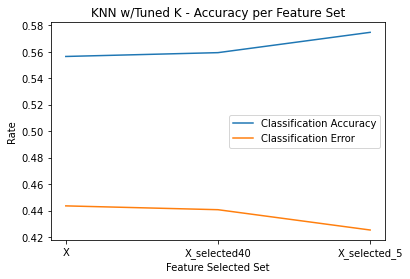

In [62]:
X_sets = ["X", "X_selected40", "X_selected_5"]
plt.plot(X_sets, accuracies, label = "Classification Accuracy")
plt.plot(X_sets, errors, label = "Classification Error")
plt.xlabel('Feature Selected Set')
plt.ylabel('Rate')
plt.title("KNN w/Tuned K - Accuracy per Feature Set")
plt.legend()
plt.show()

### Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracies = []
errors = []

In [64]:
def evaluate_model(model, y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print('Classification Accuracy:', accuracy)
    error = 1 - metrics.accuracy_score(y_test, y_pred)
    errors.append(error)
    print('Classification Error:', error)
    
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)

In [65]:
# Logistic Regression for X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
evaluate_model(logreg, y_test, y_pred)

Classification Accuracy: 0.5432692307692307
Classification Error: 0.4567307692307693
[[25 24 26]
 [13 32  9]
 [18  5 56]]


In [66]:
# Logistic Regression for X_selected_40
X_train, X_test, y_train, y_test = train_test_split(X_selected_40, y, test_size=0.20, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
evaluate_model(logreg, y_test, y_pred)

Classification Accuracy: 0.5576923076923077
Classification Error: 0.4423076923076923
[[24 24 27]
 [13 35  6]
 [15  7 57]]


In [67]:
# Logistic Regression for X_selected_5
X_train, X_test, y_train, y_test = train_test_split(X_selected_5, y, test_size=0.20, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
evaluate_model(logreg, y_test, y_pred)

Classification Accuracy: 0.6153846153846154
Classification Error: 0.3846153846153846
[[28 21 26]
 [10 38  6]
 [10  7 62]]


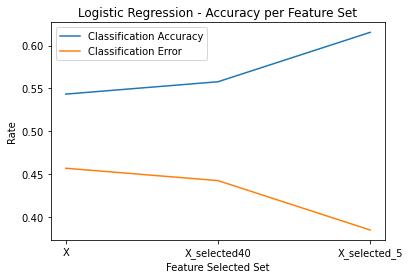

In [68]:
X_sets = ["X", "X_selected40", "X_selected_5"]
plt.plot(X_sets, accuracies, label = "Classification Accuracy")
plt.plot(X_sets, errors, label = "Classification Error")
plt.xlabel('Feature Selected Set')
plt.ylabel('Rate')
plt.title("Logistic Regression - Accuracy per Feature Set")
plt.legend()
plt.show()

###### Tuning for different hyperparameter values C

In [69]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

c_values = [0.1, 1.0, 10]
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
param_grid = dict(C=c_values)
logreg_gscv = GridSearchCV(logreg, param_grid, cv=5)

accuracies=[]
errors=[]

In [70]:
#Feature set: X
logreg_gscv.fit(X, y) #fit model to data
accuracies.append(logreg_gscv.best_score_)
errors.append(1 - logreg_gscv.best_score_)
print('Feature set: X')
print('Optimal C: ',logreg_gscv.best_params_) # top performing C
print('Mean score: ',logreg_gscv.best_score_) # mean score for the top performing C

#Feature set: X_selected_40
logreg_gscv.fit(X_selected_40, y) #fit model to data
accuracies.append(logreg_gscv.best_score_)
errors.append(1 - logreg_gscv.best_score_)
print('Feature set: X_selected_40')
print('Optimal C: ',logreg_gscv.best_params_) # top performing C
print('Mean score: ',logreg_gscv.best_score_) # mean score for the top performing C

#Feature set: X_selected_5
logreg_gscv.fit(X_selected_5, y) #fit model to data
accuracies.append(logreg_gscv.best_score_)
errors.append(1 - logreg_gscv.best_score_)
print('Feature set: X_selected_5')
print('Optimal C: ',logreg_gscv.best_params_) # top performing C
print('Mean score: ',logreg_gscv.best_score_) # mean score for the top performing C

Feature set: X
Optimal C:  {'C': 0.1}
Mean score:  0.5824228911185433
Feature set: X_selected_40
Optimal C:  {'C': 1.0}
Mean score:  0.583361204013378
Feature set: X_selected_5
Optimal C:  {'C': 1.0}
Mean score:  0.5853353771832033


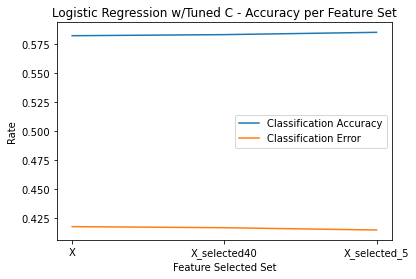

In [71]:
X_sets = ["X", "X_selected40", "X_selected_5"]
plt.plot(X_sets, accuracies, label = "Classification Accuracy")
plt.plot(X_sets, errors, label = "Classification Error")
plt.xlabel('Feature Selected Set')
plt.ylabel('Rate')
plt.title("Logistic Regression w/Tuned C - Accuracy per Feature Set")
plt.legend()
plt.show()

### Random Forest

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

accuracies = []
errors = []

In [73]:
rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=7)
cv_results = cross_validate(rf, X, y, cv=5)
accuracies.append(np.mean(cv_results['test_score']))
errors.append(1-np.mean(cv_results['test_score']))
print('Feature set: X')
print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=7)
cv_results = cross_validate(rf, X_selected_40, y, cv=5)
accuracies.append(np.mean(cv_results['test_score']))
errors.append(1-np.mean(cv_results['test_score']))
print('Feature set: X_selected_40')
print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=7)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
accuracies.append(np.mean(cv_results['test_score']))
errors.append(1-np.mean(cv_results['test_score']))
print('Feature set: X_selected_5')
print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

Feature set: X
[0.54807692 0.60096154 0.60386473 0.60869565 0.57004831]
0.5863294314381271
Feature set: X_selected_40
[0.58173077 0.57211538 0.57971014 0.62318841 0.59903382]
0.5911557041991824
Feature set: X_selected_5
[0.57211538 0.57692308 0.57971014 0.63285024 0.64251208]
0.6008221850613156


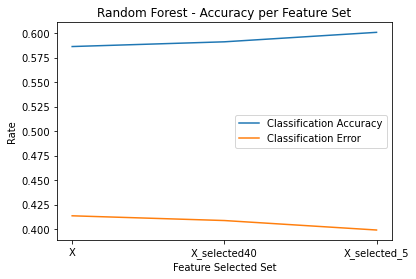

In [74]:
X_sets = ["X", "X_selected40", "X_selected_5"]
plt.plot(X_sets, accuracies, label = "Classification Accuracy")
plt.plot(X_sets, errors, label = "Classification Error")
plt.xlabel('Feature Selected Set')
plt.ylabel('Rate')
plt.title("Random Forest - Accuracy per Feature Set")
plt.legend()
plt.show()

###### Tune depth hyperparameter for each feature set

In [75]:
accuracies=[]
errors=[]

In [76]:
# Feature set X
# best: d=7, acc=58.63

temp_accs=[]
for d in [1,5,7,10,15,20]:
    rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=d)
    cv_results = cross_validate(rf, X, y, cv=5)
    temp_accs.append(np.mean(cv_results['test_score']))
    #print(cv_results['test_score'])
    print(d, np.mean(cv_results['test_score']))
best_acc = max(temp_accs)
accuracies.append(best_acc)
errors.append(1-best_acc)
print(best_acc)

1 0.48695187662578976
5 0.5824786324786324
7 0.5863294314381271
10 0.586352657004831
15 0.5795289855072464
20 0.5727796358231141
0.586352657004831


In [77]:
# Feature set X_selected_40
# best: d=4, acc=59.98

temp_accs=[]
for d in [3,4,5,6,7,8,9,10,20]:
    rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=d)
    cv_results = cross_validate(rf, X_selected_40, y, cv=5)
    temp_accs.append(np.mean(cv_results['test_score']))
    #print(cv_results['test_score'])
    print(d, np.mean(cv_results['test_score']))
best_acc = max(temp_accs)
accuracies.append(best_acc)
errors.append(1-best_acc)
print(best_acc)

3 0.5795336306205872
4 0.5998049052396879
5 0.5959587513935339
6 0.5843970642883687
7 0.5911557041991824
8 0.5901895206243032
9 0.594987922705314
10 0.5939985135637309
20 0.5737736900780379
0.5998049052396879


In [78]:
# Feature set X_selected_5
# best: d=7, acc=60.08

temp_accs=[]
for d in [5,6,7,8,9]:
    rf = RandomForestClassifier(random_state=0,n_estimators=100, max_depth=d)
    cv_results = cross_validate(rf, X_selected_5, y, cv=5)
    temp_accs.append(np.mean(cv_results['test_score']))
    #print(cv_results['test_score'])
    print(d, np.mean(cv_results['test_score']))
best_acc = max(temp_accs)
accuracies.append(best_acc)
errors.append(1-best_acc)
print(best_acc)

5 0.5969435154217764
6 0.5969202898550725
7 0.6008221850613156
8 0.5892326272761055
9 0.5853586027499071
0.6008221850613156


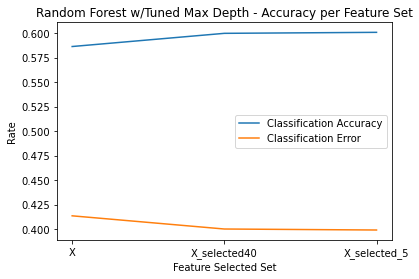

In [79]:
X_sets = ["X", "X_selected40", "X_selected_5"]
plt.plot(X_sets, accuracies, label = "Classification Accuracy")
plt.plot(X_sets, errors, label = "Classification Error")
plt.xlabel('Feature Selected Set')
plt.ylabel('Rate')
plt.title("Random Forest w/Tuned Max Depth - Accuracy per Feature Set")
plt.legend()
plt.show()

The model with the best accuracy has feature set X_selected_5 and max_depth=7. Accuracy = 0.6008221850613156

###### Focus in on X_selected_5 model

In [80]:
#experiment with n_estimators
#best: n_estimators=10000, acc=0.6027220364176886

rf = RandomForestClassifier(random_state=0,n_estimators=10000,max_depth=7)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(10000, np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=1000,max_depth=7)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(10000, np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(100, np.mean(cv_results['test_score']))

10000 0.6027220364176886
10000 0.5998467112597548
100 0.6008221850613156


In [81]:
#experiment with min_samples_leaf
#best: min_samples_leaf=9, acc=0.6065774804905241

for l in [1,2,3,4,5,6,7,8,9,10]:
    rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7,min_samples_leaf=l)
    cv_results = cross_validate(rf, X_selected_5, y, cv=5)
    #print(cv_results['test_score'])
    print(l, np.mean(cv_results['test_score']))

1 0.6008221850613156
2 0.6056159420289855
3 0.5998141954663694
4 0.5998234856930509
5 0.6046497584541063
6 0.595958751393534
7 0.5901755852842809
8 0.6027220364176886
9 0.6065774804905241
10 0.5969388703084355


In [82]:
#experiment with min_samples_split
#best: min_samples_split=3, acc=0.6056159420289855

for s in [2,3,4,5,6,7,8,9,10]:
    rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7,min_samples_split=s)
    cv_results = cross_validate(rf, X_selected_5, y, cv=5)
    #print(cv_results['test_score'])
    print(s, np.mean(cv_results['test_score']))

2 0.6008221850613156
3 0.6056159420289855
4 0.5959866220735786
5 0.6017465626161279
6 0.6046636937941287
7 0.5959587513935339
8 0.5930787811222594
9 0.6027220364176886
10 0.5998374210330732


In [83]:
#experiment with n_estimators given min_samples_split=3
#best: n_est=100, acc=0.6056159420289855

rf = RandomForestClassifier(random_state=0,n_estimators=10000,max_depth=7,min_samples_split=3)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(10000, np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=1000,max_depth=7,min_samples_split=3)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(1000, np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7,min_samples_split=3)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(100, np.mean(cv_results['test_score']))

10000 0.6007896692679302
1000 0.6027266815310293
100 0.6056159420289855


In [84]:
#experiment with n_estimators given min_samples_leaf=9
#best: n_est=100, acc=0.6065774804905241

rf = RandomForestClassifier(random_state=0,n_estimators=10000,max_depth=7,min_samples_leaf=9)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(100000, np.mean(cv_results['test_score']))

rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7,min_samples_leaf=9)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)
#print(cv_results['test_score'])
print(100, np.mean(cv_results['test_score']))

100000 0.5921079524340394
100 0.6065774804905241


The model with X_selected_5 and max_depth=7 has the best accuracy when n_estimators=100 and min_samples_leaf=9. Accuracy = 0.6065774804905241

### Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
#feature set X

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0)
cv_results = cross_validate(boost, X, y, cv=5)
#print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

0.537142326272761


In [87]:
#feature set X_selected_40

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0)
cv_results = cross_validate(boost, X_selected_40, y, cv=5)
#print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

0.5689288368636195


In [88]:
#feature set X_selected_40 and max_leaf_nodes=80

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0, max_leaf_nodes=80)
cv_results = cross_validate(boost, X_selected_40, y, cv=5)
#print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

0.5641583054626533


### SVM

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [90]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
cv_results = cross_validate(svm, X_selected_40, y, cv=5)
#print(cv_results['test_score'])
print(np.mean(cv_results['test_score']))

0.6007385730211816


# Best Models

### KNN (Accuracy = 0.5747166480862133)

In [91]:
knn = neighbors.KNeighborsClassifier() 
param_grid = {'n_neighbors': np.arange(1, 51)} 
knn_gscv = GridSearchCV(knn, param_grid, cv=5) 
knn_gscv.fit(X_selected_5, y) #fit model to data

print('Feature set: X_selected_5')
print('Optimal k: ',knn_gscv.best_params_) #top performing k
print('Mean score: ',knn_gscv.best_score_) #mean score for the top performing k

Feature set: X_selected_5
Optimal k:  {'n_neighbors': 17}
Mean score:  0.5747166480862133


### Logistic Regression (Accuracy = 0.5853353771832033)

In [92]:
c_values = [0.1, 1.0, 10]
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
param_grid = dict(C=c_values)
logreg_gscv = GridSearchCV(logreg, param_grid, cv=5)
logreg_gscv.fit(X_selected_5, y) #fit model to data

print('Feature set: X_selected_5')
print('Optimal C: ',logreg_gscv.best_params_) # top performing C
print('Mean score: ',logreg_gscv.best_score_) # mean score for the top performing C

Feature set: X_selected_5
Optimal C:  {'C': 1.0}
Mean score:  0.5853353771832033


### Random Forest (Accuracy = 0.6065774804905241)

In [93]:
rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=7,min_samples_leaf=9)
cv_results = cross_validate(rf, X_selected_5, y, cv=5)

print('Feature set: X_selected_5')
print('Optimal n_estimators=100, max_depth=7, min_samples_leaf=9')
print('Mean score: ',np.mean(cv_results['test_score']))

Feature set: X_selected_5
Optimal n_estimators=100, max_depth=7, min_samples_leaf=9
Mean score:  0.6065774804905241


### SVM (Accuracy = 0.6007385730211816)

In [94]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
cv_results = cross_validate(svm, X_selected_40, y, cv=5)

print('Feature set: X_selected_40')
print('Mean score: ',np.mean(cv_results['test_score']))

Feature set: X_selected_40
Mean score:  0.6007385730211816


### Boosting (Accuracy = 0.5689288368636195)

In [95]:
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0)
cv_results = cross_validate(boost, X_selected_40, y, cv=5)

print('Feature set: X_selected_40')
print('Optimal n_estimators=100, max_depth=7')
print('Mean score: ',np.mean(cv_results['test_score']))

Feature set: X_selected_40
Optimal n_estimators=100, max_depth=7
Mean score:  0.5689288368636195
